# Introduction

## Stanford Cars Dataset

link: https://www.kaggle.com/datasets/eduardo4jesus/stanford-cars-dataset

The Stanford Cars Dataset is a popular computer vision dataset that is used for training and evaluating image classification and object detection models. It contains a large collection of images of cars from various classes and makes, with a focus on fine-grained recognition of car models. Here are some key features of the Stanford Cars Dataset:

1. **Number of Classes:** The dataset is organized into 196 different car classes, making it a challenging dataset for fine-grained classification tasks.

2. **Image Variability:** The dataset contains a wide range of car images, capturing variations in car models, colors, and viewpoints.

3. **Annotation:** Each image in the dataset is annotated with bounding boxes around the car, which can be used for object detection tasks. Additionally, class labels are provided for image classification.

4. **Train and Test Split:** The dataset is typically divided into a training set and a test set, allowing researchers to train their models on a portion of the data and evaluate them on the remaining unseen data.

5. **Fine-Grained Classification:** Stanford Cars is often used for fine-grained classification tasks where the goal is to classify a car image into one of the 196 specific car models.

6. **Research and Benchmarking:** The dataset has been widely used in the computer vision community for research and benchmarking purposes, particularly in the field of deep learning and convolutional neural networks (CNNs).

7. **Challenges:** Due to the fine-grained nature of the dataset, recognizing subtle differences between car models can be challenging, making it a valuable resource for researchers working on image recognition and object detection.

Researchers often use the Stanford Cars Dataset to develop and evaluate their image classification and object detection models. It provides a real-world and diverse collection of images, making it a valuable resource for advancing the state of the art in computer vision.

## Importing the required libraries

In [13]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.io import loadmat
from PIL import Image
from sklearn.preprocessing import StandardScaler
from pathlib import Path

### directory setup

In [2]:
root_dir = Path('data')
cars_meta = root_dir / 'cars_meta.mat'

cars_train = root_dir / 'cars_train' / 'cars_train'
cars_train_meta= root_dir / 'cars_train_annos.mat'

cars_test = root_dir / 'cars_test' / 'cars_test'
cars_test_meta= root_dir / 'cars_test_annos.mat'

In [3]:
print(os.listdir(root_dir))

['cars_meta.mat', 'cars_test', 'cars_test_annos.mat', 'cars_train', 'cars_train_annos.mat']


## Extracting Information from Dataset

In [4]:
cars_meta_mat = loadmat(cars_meta)

class_names = [arr[0] for arr in cars_meta_mat['class_names'][0]]
print(class_names)

['AM General Hummer SUV 2000', 'Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura Integra Type R 2001', 'Acura ZDX Hatchback 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Convertible 2012', 'Aston Martin Virage Coupe 2012', 'Audi RS 4 Convertible 2008', 'Audi A5 Coupe 2012', 'Audi TTS Coupe 2012', 'Audi R8 Coupe 2012', 'Audi V8 Sedan 1994', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 'Audi TT Hatchback 2011', 'Audi S6 Sedan 2011', 'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012', 'Audi S4 Sedan 2012', 'Audi S4 Sedan 2007', 'Audi TT RS Coupe 2012', 'BMW ActiveHybrid 5 Sedan 2012', 'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012', 'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012', 'BMW 6 Series Convertible 2007', 'BMW X5 SUV 2007', 'BMW X6 SUV 2012', 'BMW M3 Coupe 2012', 'BMW M5 Sedan 2010', 'BMW M6 Convertible 2010', 'BMW X3 SUV 2012', 'BMW Z4 Convertible 2012

In [5]:
# Load the train and test meta data
cars_train_meta_mat, cars_test_meta_mat = loadmat(cars_train_meta), loadmat(cars_test_meta)

In [6]:
train_data = cars_train_meta_mat['annotations'][0]
print('Type: ', train_data.dtype)
print('\nShape: ', train_data.shape)
print('\nTrain data: ', train_data)

Type:  [('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('class', 'O'), ('fname', 'O')]

Shape:  (8144,)

Train data:  [(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9'))
 (array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9'))
 (array([[85]], dtype=uint8), array([[109]], dtype=uint8), array([[601]], dtype=uint16), array([[381]], dtype=uint16), array([[91]], dtype=uint8), array(['00003.jpg'], dtype='<U9'))
 ...
 (array([[26]], dtype=uint8), array([[246]], dtype=uint8), array([[660]], dtype=uint16), array([[449]], dtype=uint16), array([[163]], dtype=uint8), array(['08142.jpg'], dtype='<U9'))
 (array([[78]], dtype=uint8), array([[526]], dtype=uint16), array([[1489]], dtype=uint16), array([[908]], dtype=uint16), arr

In [7]:
test_data = cars_test_meta_mat['annotations'][0]
print('Type: ', test_data.dtype)
print('\nShape: ', test_data.shape)
print('\nTest data: ', test_data)

Type:  [('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('fname', 'O')]

Shape:  (8041,)

Test data:  [(array([[30]], dtype=uint8), array([[52]], dtype=uint8), array([[246]], dtype=uint8), array([[147]], dtype=uint8), array(['00001.jpg'], dtype='<U9'))
 (array([[100]], dtype=uint8), array([[19]], dtype=uint8), array([[576]], dtype=uint16), array([[203]], dtype=uint8), array(['00002.jpg'], dtype='<U9'))
 (array([[51]], dtype=uint8), array([[105]], dtype=uint8), array([[968]], dtype=uint16), array([[659]], dtype=uint16), array(['00003.jpg'], dtype='<U9'))
 ...
 (array([[33]], dtype=uint8), array([[27]], dtype=uint8), array([[602]], dtype=uint16), array([[252]], dtype=uint8), array(['08039.jpg'], dtype='<U9'))
 (array([[33]], dtype=uint8), array([[142]], dtype=uint8), array([[521]], dtype=uint16), array([[376]], dtype=uint16), array(['08040.jpg'], dtype='<U9'))
 (array([[77]], dtype=uint8), array([[73]], dtype=uint8), array([[506]], dtype=uint16), array([[380]], dt

## Creating a dataframe from the trainset

In [23]:
columns = ['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class_id', 'file_name']

# Extract data from the train_data array
data = [[item[i][0][0] if i != 5 else item[i][0] for item in train_data] for i in range(len(columns))]

# Create a dictionary for the data
data_dict = {column: data[i] for i, column in enumerate(columns)}

# Convert the dictionary to a DataFrame
train_df = pd.DataFrame(data_dict)

# # Map class IDs to class names using the provided class_names array
train_df['class_name'] = [class_names[i - 1] if 0 <= i - 1 < len(class_names) else np.nan for i in train_df['class_id']]

# Display the DataFrame
train_df

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class_id,file_name,class_name
0,39,116,569,375,14,00001.jpg,Audi TTS Coupe 2012
1,36,116,868,587,3,00002.jpg,Acura TL Sedan 2012
2,85,109,601,381,91,00003.jpg,Dodge Dakota Club Cab 2007
3,621,393,1484,1096,-122,00004.jpg,NaN
4,14,36,133,99,106,00005.jpg,Ford F-450 Super Duty Crew Cab 2012
...,...,...,...,...,...,...,...
8139,3,44,423,336,78,08140.jpg,Chrysler Town and Country Minivan 2012
8140,138,150,706,523,-60,08141.jpg,NaN
8141,26,246,660,449,-93,08142.jpg,NaN
8142,78,526,1489,908,112,08143.jpg,Ford GT Coupe 2006


In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bbox_x1     8144 non-null   int16 
 1   bbox_y1     8144 non-null   int16 
 2   bbox_x2     8144 non-null   int16 
 3   bbox_y2     8144 non-null   int16 
 4   class_id    8144 non-null   int8  
 5   file_name   8144 non-null   object
 6   class_name  5292 non-null   object
dtypes: int16(4), int8(1), object(2)
memory usage: 199.0+ KB


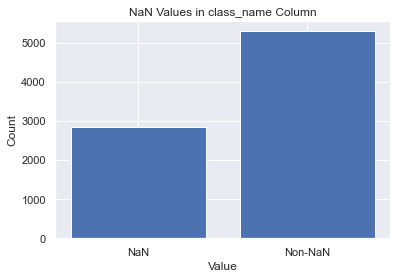

In [25]:
nan_rows = train_df[train_df['class_name'].isna()]

# Step 2: Visualize the NaN values
# Option 1: Print the rows with NaN values
# print("Rows with NaN in 'class_name':")
# print(nan_rows)

# Option 2: Plot a histogram to visualize the distribution of NaN values
nan_count = nan_rows.shape[0]
total_rows = train_df.shape[0]
plt.bar(['NaN', 'Non-NaN'], [nan_count, total_rows - nan_count])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('NaN Values in class_name Column')
plt.show()

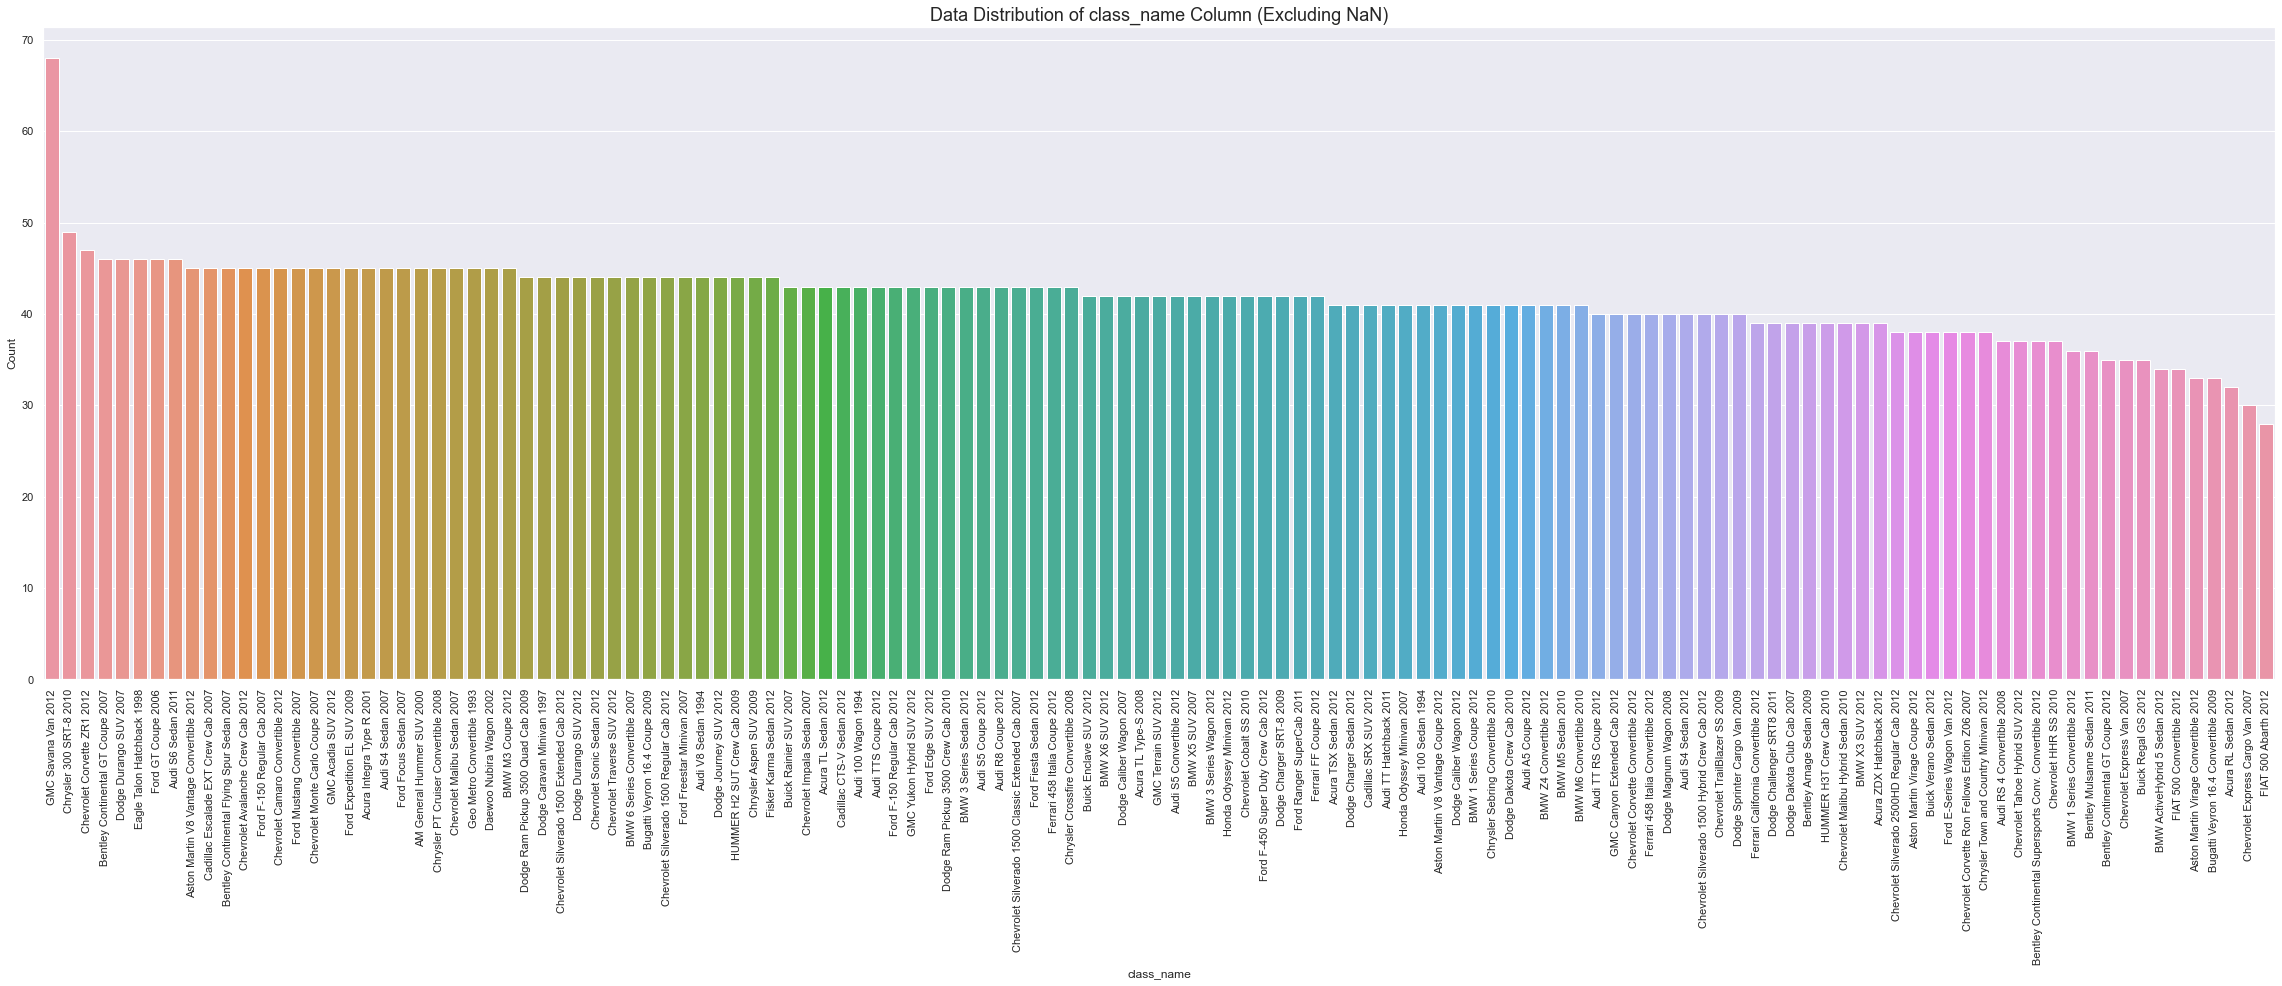

In [29]:
filtered_df = train_df.dropna(subset=['class_name'])

# Create a countplot to visualize the data distribution of the 'class_name' column
plt.figure(figsize=(40, 12))  # Set the figure size

# Use sns.countplot() to create the countplot
sns.set(style="darkgrid")  # Set the style of the plot
sns.countplot(data=filtered_df, x='class_name', order=filtered_df['class_name'].value_counts().index)
sns.set(font_scale=1.5)
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.title('Data Distribution of class_name Column (Excluding NaN)')
plt.xlabel('class_name')
plt.ylabel('Count')
plt.show()

## Creating a dataframe from testset

In [10]:
columns = ['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'file_name']

# Extract data from the train_data array
data = [[item[i][0][0] if i != 4 else item[i][0] for item in test_data] for i in range(len(columns))]

# Create a dictionary for the data
data_dict = {column: data[i] for i, column in enumerate(columns)}

# Convert the dictionary to a DataFrame
test_df = pd.DataFrame(data_dict)

# Display the DataFrame
test_df

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,file_name
0,30,52,246,147,00001.jpg
1,100,19,576,203,00002.jpg
2,51,105,968,659,00003.jpg
3,67,84,581,407,00004.jpg
4,140,151,593,339,00005.jpg
...,...,...,...,...,...
8036,49,57,1169,669,08037.jpg
8037,23,18,640,459,08038.jpg
8038,33,27,602,252,08039.jpg
8039,33,142,521,376,08040.jpg


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bbox_x1    8041 non-null   int16 
 1   bbox_y1    8041 non-null   int16 
 2   bbox_x2    8041 non-null   int16 
 3   bbox_y2    8041 non-null   int16 
 4   file_name  8041 non-null   object
dtypes: int16(4), object(1)
memory usage: 125.8+ KB


### print image function


In [12]:
def print_images(df, size, folder):
    # Define the number of rows and columns for the subplot grid
    num_rows, num_cols = size
    size = num_rows * num_cols

    # Create a subplot grid
    fig, axes_list = plt.subplots(num_rows, num_cols, figsize=(20, 10))
    fig.suptitle(f'First {size} Cars from {folder}')

    # Select the first samples from the DataFrame
    selected_samples = df.head(size)

    # Loop through the selected samples
    for i, ax in enumerate(axes_list.flatten()):
        ax.axis('off')
        # Check if there are still samples to display
        if i < len(selected_samples):
            sample = selected_samples.iloc[i]
            sample_path = sample['file_name']
            sample_class = sample['class_name'] if 'class_name' in sample else ''

            im = Image.open(folder / sample_path)
            ax.imshow(im)
            ax.set_title(sample_class, fontdict={"fontsize": 12})

            # Check if the DataFrame contains bounding box information
            if 'bbox_x1' in sample and 'bbox_y1' in sample and 'bbox_x2' in sample and 'bbox_y2' in sample:
                # Extract bounding box coordinates
                x1, y1, x2, y2 = sample['bbox_x1'], sample['bbox_y1'], sample['bbox_x2'], sample['bbox_y2']
                # Create a rectangle patch
                rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='limegreen', facecolor='none')
                ax.add_patch(rect)

    # Display the plot
    plt.show()

### Sample Training Images

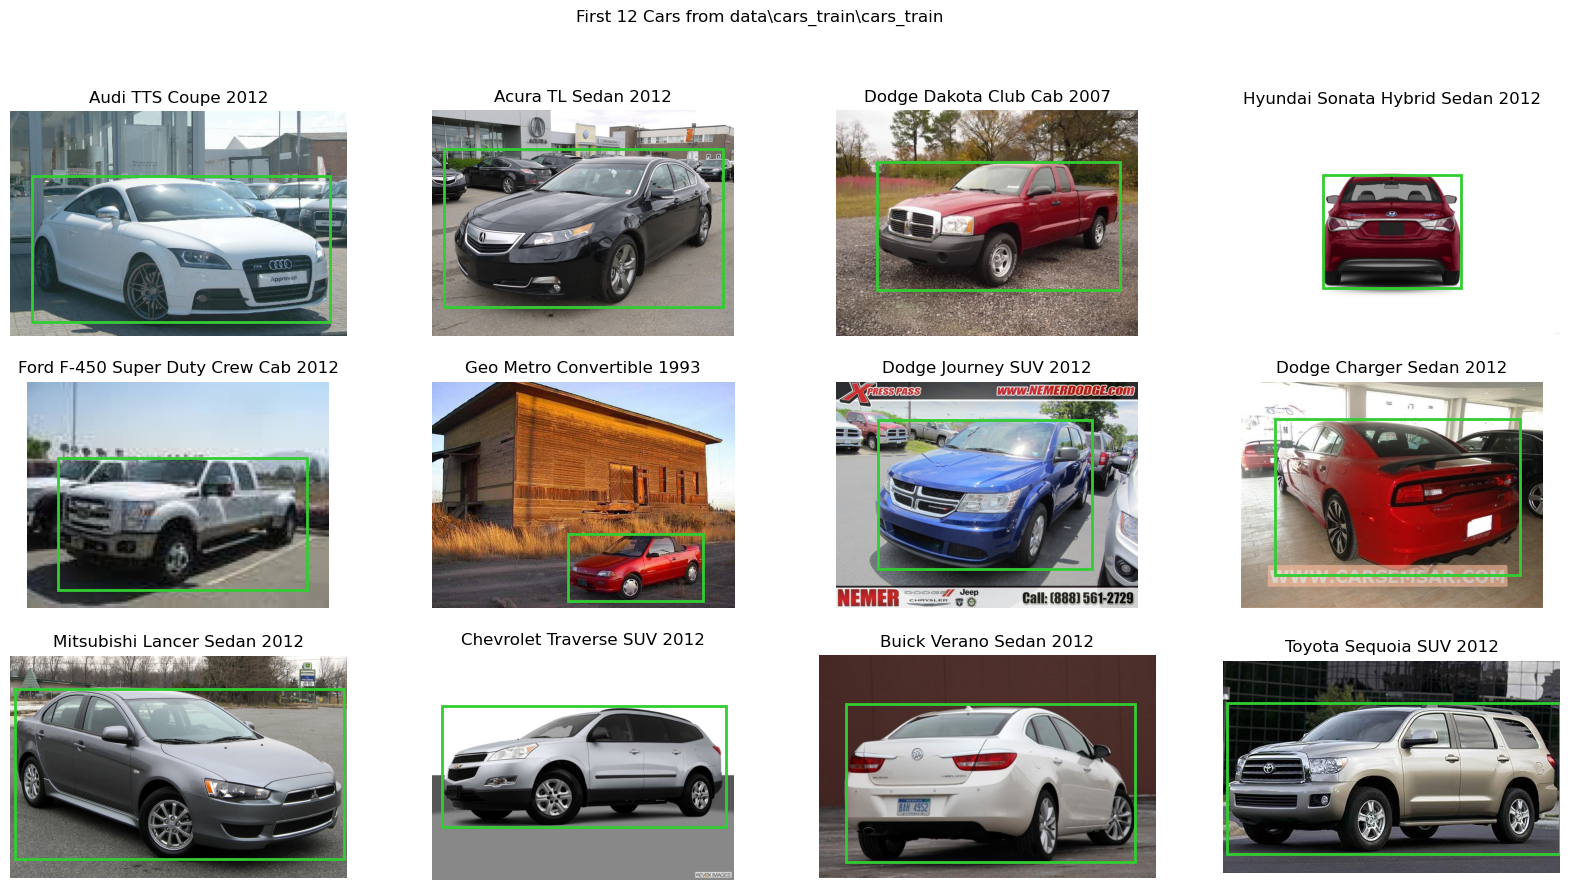

In [13]:
print_images(train_df, (3,4), cars_train)

### Sample Test Images

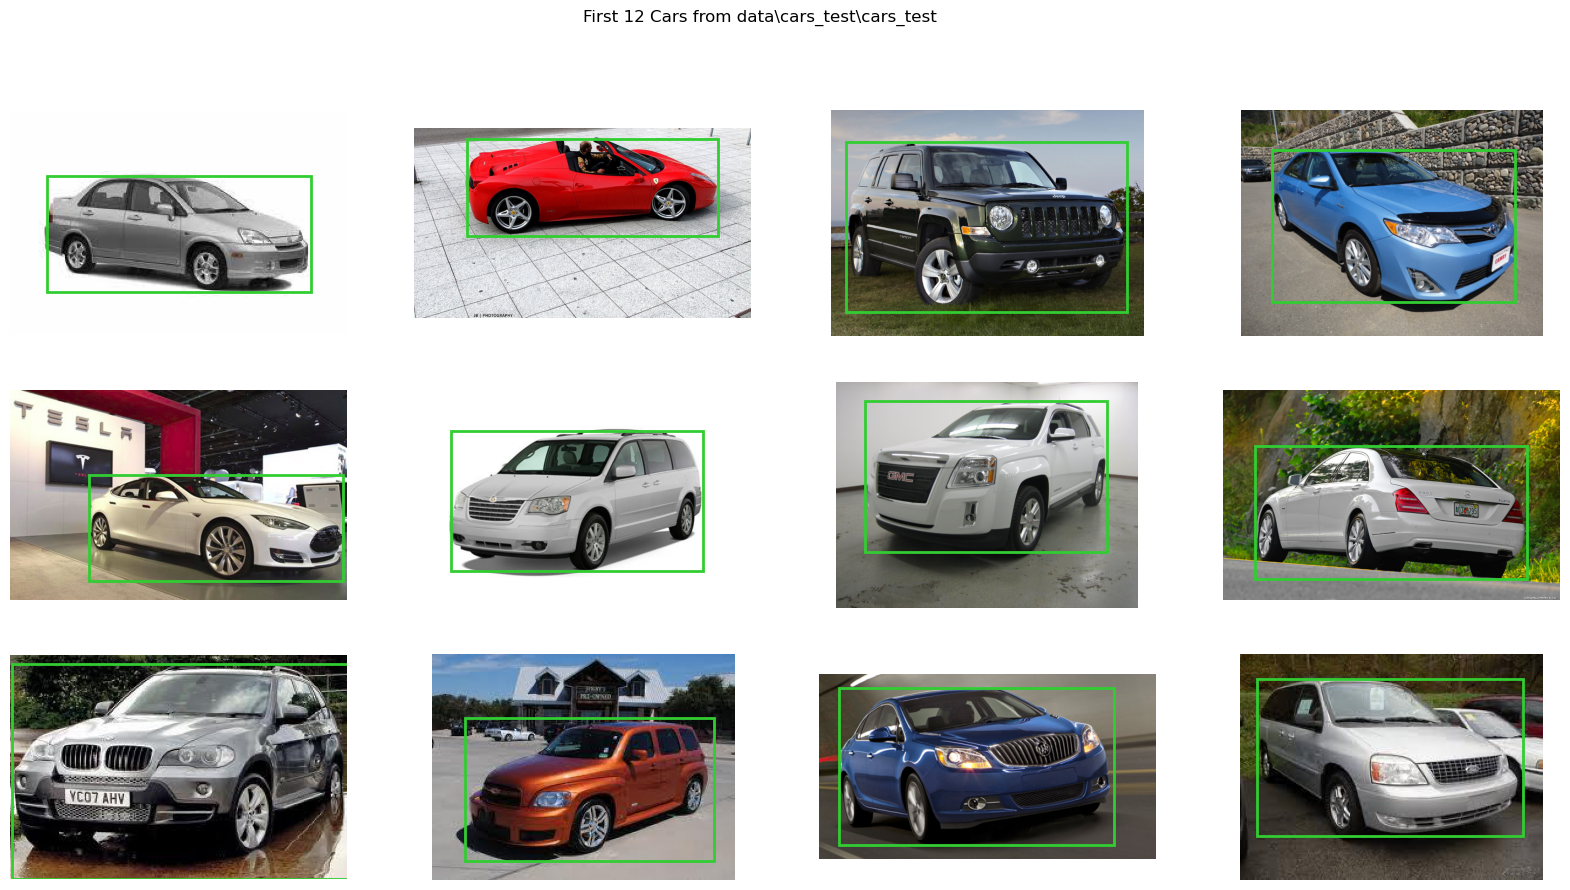

In [14]:
print_images(test_df, (3,4), cars_test)

In [82]:
df = pd.read_csv("./data/data.csv",header=0,parse_dates=["Timestamp"])
# df.set_index("Timestamp", inplace=True)

In [83]:
df

,Issue Description,City,State/Country,Timestamp
0,Oil leak,San Francisco,CA,2023-10-20 19:45:00
1,Check engine light on,Atlanta,GA,2023-10-20 20:20:00
2,Strange odor from vents,Austin,TX,2023-10-20 21:35:00
3,Worn-out brake pads,Philadelphia,PA,2023-10-20 22:10:00
4,Exhaust system issues,Detroit,MI,2023-10-20 23:25:00
...,...,...,...,...
1489,Sudden loss of power,London,England,2023-12-21 13:45:00
1490,Radiator leak,Paris,France,2023-12-21 14:00:00
1491,Sticky gas pedal,Berlin,Germany,2023-12-21 15:15:00
1492,Whining noise from transmission,Rome,Italy,2023-12-21 16:30:00


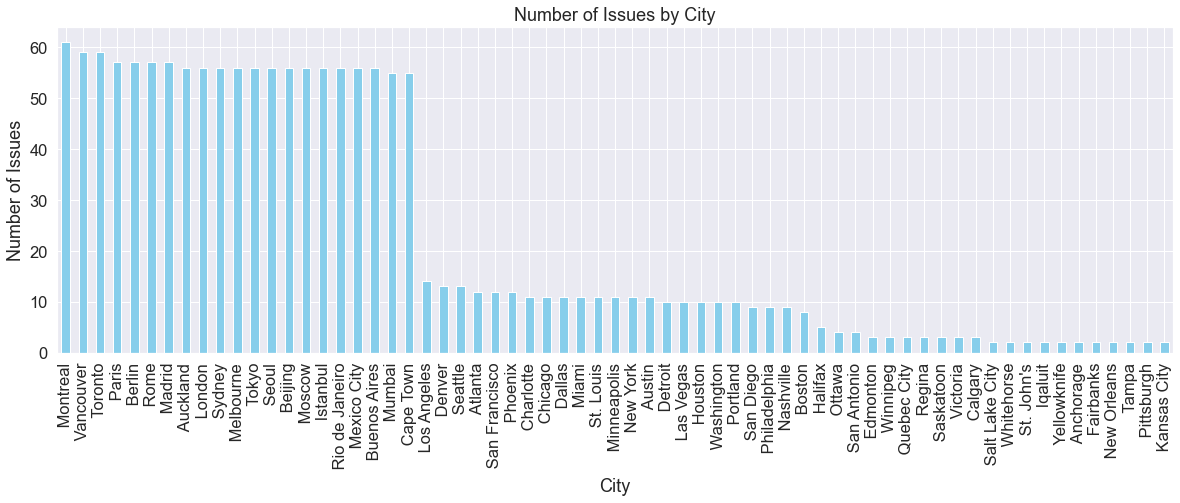

In [85]:

plt.figure(figsize=(20, 6))
city_counts = df["City"].value_counts()
city_counts.plot(kind="bar", color="skyblue")
plt.title("Number of Issues by City")
plt.xlabel("City")
plt.ylabel("Number of Issues")

# Show the plots
plt.show()